<a href="https://colab.research.google.com/github/nickstone1911/data-analysis-practice/blob/main/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Business Analytics
## K Nearest Neighbors (KNN) Code-Along Notebook

## Learning Objectives
In this code-along, we will learn about:

1. The fundamentals of the KNN classifier in scikit-learn
2. Methods for finding the best value for `k`
3. The `Pipeline` library for organizing data processing

---


# KNN -  K Nearest Neighbors - Classification

To help us understand k-nearest neighnors (KNN) for classification, we'll work with a simple dataset representing gene expression levels.

## Data Description
Gene expression levels are calculated by the ratio between the expression of the target gene (i.e., the gene of interest) and the expression of one or more reference genes (often household genes). This dataset is synthetic and specifically designed to show some of the strengths and limitations of using KNN for Classification.


More info on gene expression: https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/gene-expression-level



# Section 1: Setting up the Environment

## 1.1: Imports

In the next cell import the following modules:

>- `os`, `numpy`, `pandas`, `matplotlib.pyplot`, `seaborn`
>- Use the common aliases for each of these

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2: Set Your Working Directory

In the next cell, set your working directory to your desired workspace for this lesson.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/BAIM4205')
os.getcwd()

Mounted at /content/drive/


'/content/drive/MyDrive/BAIM4205'

## 1.3: Load Data

The gene expression data can be found in the following csv file. Download/move the file to your working directory.

>- [gene_expression.csv](https://drive.google.com/file/d/1HIxldsPT-CjwIlCw2uWtbdyLQJpWUWee/view?usp=sharing)

In the next cell(s) check that the file is in your working directory then load it into a dataframe named, `gene_df`

In [ ]:
os.listdir()

['customer.csv',
 'winedata.csv',
 'W1D2 Agenda and Exercises - Student.ipynb',
 'W1D1 - Working With Google Drive and the os Module_student.ipynb',
 'heart.csv',
 'mouse_viral_study.csv',
 'svm_margin_plot.py',
 '__pycache__',
 'wine_fraud.csv',
 'titanic_train.csv',
 '.ipynb_checkpoints',
 'titanic_train_clean.csv',
 'ORNG.csv',
 'USIX.csv',
 'W2D1 Lesson 24: Code-Along - Intro to Data Engineering with the BigQuery API.ipynb',
 'gene_expression.csv']

In [ ]:
gene_df = pd.read_csv('gene_expression.csv')

## 1.4: Check Records

In the next cell, show the first 5 records of `gene_df`.

In [ ]:
gene_df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


# Section 2: Data Exploration

In this section we examine the data more closely.

## 2.1: Scatterplot

In the next cell replicate the chart given in the image file below.

>- [Lesson11_2.1_scatter.png](https://drive.google.com/file/d/1Qj8tihznvJfMhHFic5QBvNeIp-_EoMYD/view?usp=sharing)

[Text(0.5, 1.0, 'Scatter Plot of Gene One vs. Gene Two')]

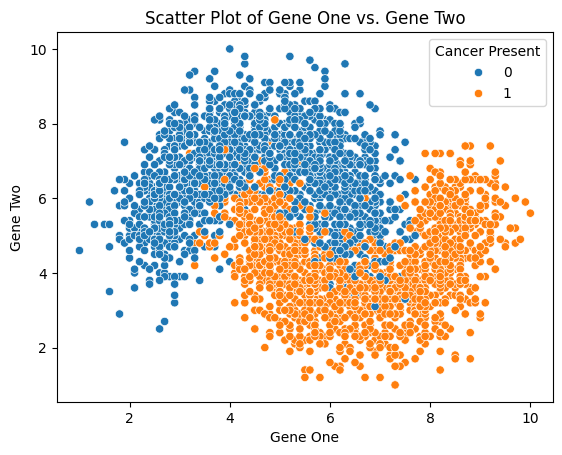

In [ ]:
sns.scatterplot(data = gene_df, x = 'Gene One', y = 'Gene Two', hue = 'Cancer Present').set(title='Scatter Plot of Gene One vs. Gene Two')

## 2.2: Zoomed In Scatterplot

Let's zoom in to a specific area of the chart by setting the following x and y limits:

>- Set the x limit to range from 2 to 6
>- Set the y limit to range from 3 to 10

Replicate the following chart:

>- [Lesson11_2.2_scatter.png](https://drive.google.com/file/d/1-9mS_0Ik4ZeUGsywJXIgWm3OzdA8EARq/view?usp=sharing)

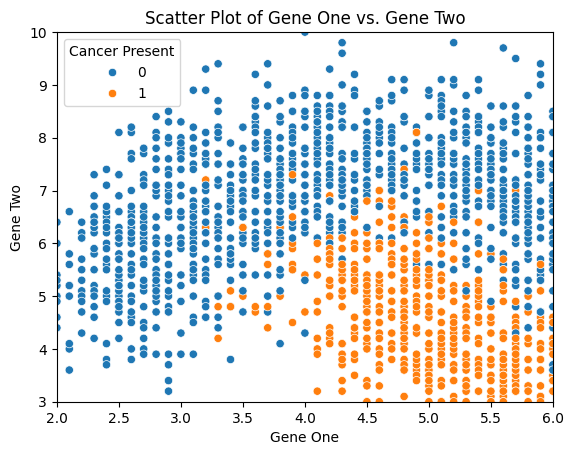

In [ ]:
fig, ax = plt.subplots()

x = gene_df['Gene One']
y = gene_df['Gene Two']
target = gene_df['Cancer Present']

sns.scatterplot(x=x, y=y, hue = target, data = gene_df, ax = ax)

ax.set_title('Scatter Plot of Gene One vs. Gene Two')

ax.set_xlim(2, 6)
ax.set_ylim(3,10)

plt.show()

## 2.3: Descriptive Stats

In the next cell, show the descriptive stats for all the columns in `gene_df`:

>- Round the results to two decimals

In [ ]:
round(gene_df.describe(),2)

,Gene One,Gene Two,Cancer Present
count,3000.00,3000.00,3000.0
mean,5.60,5.41,0.5
std,1.83,1.73,0.5
min,1.00,1.00,0.0
25%,4.30,4.00,0.0
50%,5.60,5.40,0.5
75%,6.90,6.70,1.0
max,10.00,10.00,1.0


## 2.4: Class Distributions

In the next, cell show the class distributions.

In [ ]:
gene_df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

## 2.5: Missing Values

In the next code cell, check whether there are any missing values in `gene_df`.

In [ ]:
gene_df.isna().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

# Section 3: Train/Test/Split

In this section we perform our standard train/test/split procedure.

Recall the train/test/split procedure:

## In this section we will:
1. Import Libraries
2. Split Data in Train/Test for both X and y
3. Fit/Train Scaler on Training X Data
4. Scale X Test Data
5. Create Model
6. Fit/Train Model on X Train Data
7. Evaluate Model on X Test Data (by creating predictions and comparing to Y_test)
8. Adjust Parameters as Necessary and repeat steps 5 and 6



## 3.1: Imports

In the next cell, import the libraries for performing a train-test-split on the data and for standardizing the data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 3.2: Split Data into Training and Testing Sets



### 3.2.1: Define `X` and `y`

In the next cell, define your `X` and `y` data.

In [ ]:
X = gene_df.drop('Cancer Present', axis=1)
y = gene_df['Cancer Present']
X.head()

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Cancer Present, dtype: int64

### 3.2.2: Split Data

In the next cell, split the data into training and testing sets based on:

1. Test size of .3
2. Random state of 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

### 3.3: Scale the Data

In the next cell(s), scale the training and test `X` datasets using `StandardScaler()`.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3.4: Fit the Model

In this section we learn to fit a knn model with the `KNeighborsClassifier`.

### KNN Algorithm Basics
1. Choose K value.
2. Sort feature vectors (N dimensional space) by distance metric.
3. Choose class based on K nearest feature vectors.

---


### 3.4.1: Import `KNeighborsClassifier`

In the next cell, import `KNeighborsClassifier`:

>- See [KNeighborsClassifier doc](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for more information

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### 3.4.2: Instantiate the `knn_model`

In the next cell create an instance of the `KNeighborsClassifier` and name it `knn_model`:

>- Set the `n_neighbors` parameter to 1 for this first model.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 1)

### 3.4.3: Fit the `knn_model` using the scaled X data

In the next cell, fit the `knn_model` to the scaled training data.

In [ ]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

## 3.5: Model Evaluation

In this section, we evaluate our first knn model.

### 3.5.1: Make Predictions

In the next cell, use `knn_model` to make predictions and store in a variable, `y_pred`. Make sure you use `scaled_X_test`.

In [ ]:
y_pred = knn_model.predict(X_test_scaled)

### 3.5.2: Metric Imports

In the next cell, import the modules for:
>- `classification_report`
>- `confusion_matrix`
>- `accuracy_score`

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### 3.5.3: Accuracy

In the next cell, show the accuracy of the `knn_model`:

>- Round to two decimals
>- When entering data enter in the format: `0.XX`

In [ ]:
round(accuracy_score(y_test, y_pred),2)

0.89

### 3.5.4: Confusion Matrix

In the next cell, show the confusion matrix for `knn_model`.

>- Pass in the appropriate parameters and argument so this confusion matrix will show the rates: TP, TN, FP, FN rates in the matrix.
>>- See [confusion_matrix doc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn-metrics-confusion-matrix) for help on what parameter and argument to pass to get these rates.

>- Convert the confusion matrix to a dataframe
>- Round the rates to three decimals
>- When entering data enter in the format: `0.XXX`

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm

array([[0.89787234, 0.10212766],
       [0.11627907, 0.88372093]])

In [ ]:
tn, fp, fn, tp = cm.ravel()
cm_df = pd.DataFrame(cm.round(3), index = ['no_cancer(0)', 'cancer(1)'], columns = ['pred_no_cancer(0)', 'pred_cancer(1)'])

cm_df

,pred_no_cancer(0),pred_cancer(1)
no_cancer(0),0.898,0.102
cancer(1),0.116,0.884


### 3.5.5: Classification Report

In the next cell, show the classification report for the `knn_model`:

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['no cancer present', 'cancer present']))

                   precision    recall  f1-score   support

no cancer present       0.89      0.90      0.90       470
   cancer present       0.89      0.88      0.89       430

         accuracy                           0.89       900
        macro avg       0.89      0.89      0.89       900
     weighted avg       0.89      0.89      0.89       900



## 3.6: Adjust Parameters if Necessary

### Understanding KNN and Choosing K Value

We want a K value that minimizes error:
>- Error = 1 - Accuracy

#### Two methods:
1. Elbow method.
>- We plot various K values against various error rates
>- Then we look for the point where the chart levels off and creates the "elbow"
2. Cross validate a grid search of multiple K values and choose K that results in lowest error or highest accuracy.
>- Cross validation only takes into account the K value with the lowest error rate across multiple folds.
>- This could result in a more complex model (higher value of K).
>- Consider the context of the problem to decide if larger K values are an issue.

---



## 3.6.1: Elbow Method

In in the next cell, create a for loop with the header `for k in range(1, 30):` that will:

>- Loop through various values of k and create a new `knn_model` at each iteration
>- Then each model should be fit with the current value of k
>- Predictions should be made for each model
>- Test error should be calculated for each model
>>- round the test errors to 3 decimals
>- Then all the test errors should be stored in a `test_error_rates` list

In [ ]:
test_error_rates = []
for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    error = 1 - (accuracy_score(y_test, y_pred))
    test_error_rates.append(round(error,3))
test_error_rates

[0.109,
 0.1,
 0.073,
 0.076,
 0.072,
 0.067,
 0.064,
 0.064,
 0.058,
 0.063,
 0.061,
 0.06,
 0.061,
 0.062,
 0.059,
 0.058,
 0.057,
 0.056,
 0.053,
 0.053,
 0.054,
 0.051,
 0.054,
 0.054,
 0.057,
 0.057,
 0.056,
 0.058,
 0.058]

#### Plot the Test Error Rates vs. the K values

In the next cell, plot the k values (x-axis) versus the test error rates (y-axis).

>- Replicate this chart: [Lesson11_3.6.1_elbow.png](https://drive.google.com/file/d/1-E659ORWpE05pEQy8FQolyA5vESRe4-s/view?usp=sharing)

#### Notes on the Elbow Chart

Based on the elbow chart, jot down some notes about what you observe about the values of k and the error rates.

>- The minimum error occurs around k = 22 or 23
>- The error drops below the average (red line) at around k = 9 with a value around 0.058-0.06
>- Increasing to k = 22 or 23 doesn't change the error rate that much (< 1%) so it might not be worth the extra model complexity to increase k this high. It looks like k between 8-15 would offer good results while keeping model complexity more reasonable

---

## 3.6.2: Full Cross Validation Grid Search for K Value

### 3.6.2.1: Creating a Pipeline to find K value

#### Notes on Piplelines

`Pipelines` are a simple way to keep your data preprocessing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.

Many data scientists hack together models without pipelines, but pipelines have some important benefits. Those include:

1. Cleaner Code: Accounting for data at each step of preprocessing can get messy. With a pipeline, you won't need to manually keep track of your training and validation data at each step.
2. Fewer Bugs: There are fewer opportunities to misapply a step or forget a preprocessing step.
3. Easier to Productionize: It can be surprisingly hard to transition a model from a prototype to something deployable at scale. We won't go into the many related concerns here, but pipelines can help.
4. More Options for Model Validation: You will see an example in the next tutorial, which covers cross-validation.

>- [Source](https://www.kaggle.com/code/alexisbcook/pipelines)

---

We'll use a Pipeline object to set up a workflow of operations:

1. Scale Data
2. Create Model on Scaled Data

Pipeplines are not always necessary but they can make your work/data flow better.

----
#### How does the Scaler work inside a Pipeline with CV?
>- Is scikit-learn "smart" enough to understand .fit() on train vs .transform() on train and test?
>- **Yes! Scikit-Learn's pipeline is well suited for this! [Full Info in Documentation](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) **

When you use the `StandardScaler` as a step inside a Pipeline then scikit-learn will internally do the job for you.

#### How it works
Here are the steps working behind the scenes:

* Step 0: The data are split into TRAINING data and TEST data according to the cv parameter that you specified in the GridSearchCV.
* Step 1: the scaler is fitted on the TRAINING data
* Step 2: the scaler transforms TRAINING data
* Step 3: the models are fitted/trained using the transformed TRAINING data
* Step 4: the scaler is used to transform the TEST data
* Step 5: the trained models predict using the transformed TEST data

----

Note: As we setup our Pipeline, we need to be careful to use specific string codes AND variable names so that everything matches up correctly. This is not a case where you can easily swap out variable names for whatever you want.

First, define the scaler object.

In [ ]:
scaler = StandardScaler()

Next, define the model object.

In [ ]:
knn_model = KNeighborsClassifier()

Now, take a look at the parameters in `knn`. This allows us to see the specific string codes that we need for the classifier.

Set up the Pipline operations.
>- This will be a list of tuple codes
>- The first value in the tuple will be a string code referring to the operation (e.g., 'scaler', or 'knn')
>- The second value in the tuple refers to the object/variable the performs the operation

We place the operations in order that we want them performed:

For example:
1. Scale the Data
2. Encode categorical data
3. Fit the model

In [ ]:
operations = [('scaler',scaler),('knn',knn_model)]

Now, import `Pipeline`

```
from sklearn.pipeline import Pipeline
```

In [ ]:
from sklearn.pipeline import Pipeline

Create your Pipeline object:

In [ ]:
pipe = Pipeline(operations)

### 3.6.2.2: Performing the Grid Search Using the Pipeline

---
*Note: If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:**

* `chosen_string_name` + **two** underscores + parameter key name
* model_name + __ + parameter name

For example:
* knn_model + __ + n_neighbors
* knn_model__n_neighbors

[StackOverflow on this](https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline)

The reason we have to do this is because it let's scikit-learn know what operation in the pipeline these parameters are related to (otherwise it might think n_neighbors was a parameter in the scaler).

---

Define the parameters to search.
>- For this exercise search for k-values between 1-19

Define the parameter grid, note the double, `__` used:

Define the `full_cv_classifier`:

In the next cell, define a `GridSearchCV()` object and pass in the following:
>- `pipe` - the pipeline object we created
>- `param_grid` - the parameter object we defined in the prior cell
>- `cv` set this to 5 cross folds
>- `scoring` set this to accuracy

Review [GridSearchCV doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for more information.

Name the GridSearchCV object: `full_cv_classifier`:


Now, fit `full_cv_classifier` the training data.

### 3.6.2.3: Show the Best Parameters

In the next cell, show the best parameters returned from the grid search. Jot down the optimal value of k provided.

```
full_cv_classifier.best_estimator_.get_params()
```

### 3.6.2.4: Show the Cross Validation Results of Grid Search

In the next cell:

>- Show the cross validation resuls (`cv_results_`) as a DataFrame
>- Sort the results by `rank_test_score` in ascending order so you can see the highers ranked models first

# Section 4: Final Model
In this section we build and evaluate our final model.

We just saw that our  GridSearch recommends a K=16 (in line with our alternative Elbow Method).

Let's now use the PipeLine again, but this time, no need to do a grid search, instead we will evaluate on our hold-out Test Set.

## 4.1: Define Final Pipeline Operations

In the next cell, define the operations for a new pipeline based on:

1. scaler set to `StandardScaler()`
2. `knn16` which is a `KNeighborsClassifier` with k = 16
3. `operations` which is the list of tuples to define the steps in the pipeline

In [ ]:
scaler = StandardScaler()
knn16 = KNeighborsClassifier(n_neighbors=16)
operations = [('scaler',scaler),('knn16',knn16)]

## 4.2: Define Pipeline Object

In the next cell, define `pipe` which is the new pipeline based on the operations defined in 4.1.

In [ ]:
pipe = Pipeline(operations)

## 4.3: Fit `pipe` to the Training Data

In the next cell, fit the new pipeline to the training data.

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn16', KNeighborsClassifier(n_neighbors=16))])

## 4.4: Predict with `pipe`

In the next cell, use `pipe` to predict values. Name the predictions `pipe_pred`.

In [ ]:
pipe_pred = pipe.predict(X_test)

## 4.5: Evaluate `pipe`

In the next cell, show the classification report for the `pipe` model.

>- Compare these results to the prior classification report in section `3.5.5`

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['no cancer present', 'cancer present']))

                   precision    recall  f1-score   support

no cancer present       0.94      0.95      0.95       470
   cancer present       0.95      0.93      0.94       430

         accuracy                           0.94       900
        macro avg       0.94      0.94      0.94       900
     weighted avg       0.94      0.94      0.94       900



## 4.6: Deploy Model

To practice deploying the model, use the model to predict a new case.

Suppose a person performs a gene test and receives the following scores:

>- Case 1: "Gene One" = 3.8, "Gene Two" = 6.3


### 4.6.1: What class does the model predict for the new patient?

In [ ]:
new_case = [[3.8, 6.3]]

In [ ]:
print(pipe.predict(new_case))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### 4.6.2: What is the probability the new patient belongs to the predicted class?

----